# Predecir coste de incidente de seguridad

A partir de datos generados aleatoriamente, crear un modelo de regresión lineal capaz de predecir el coste de un incidente de seguridad.

La caracteristica de entrada **x** será el número de equipos afectados y la
etiqueta **y** será el coste del incidente.

## 1. Generar conjunto de datos

In [25]:
import numpy as np

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.rand(100, 1)

print('Longitud del conjunto de datos: ', len(x))

Longitud del conjunto de datos:  100


In [26]:
# Visualizar el conjunto
import matplotlib.pyplot as plt
%matplotlib inline

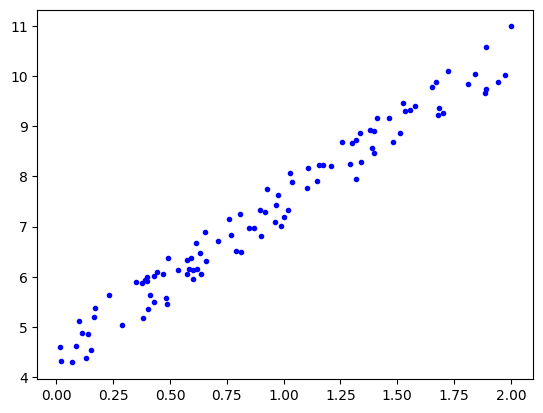

In [27]:
plt.plot(x, y, 'b.')
plt.show()

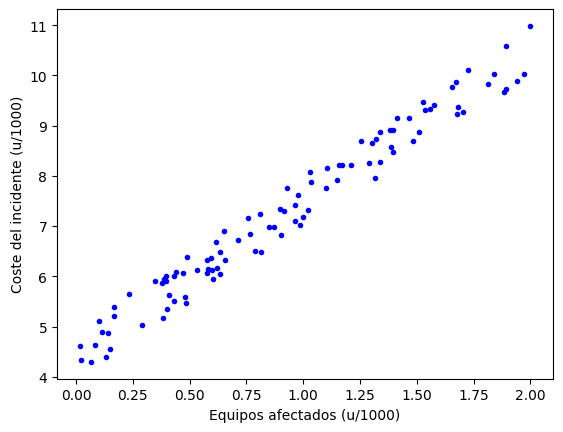

In [28]:
plt.plot(x, y, 'b.')
plt.xlabel('Equipos afectados (u/1000)')
plt.ylabel('Coste del incidente (u/1000)')
plt.show()

## Modificar el conjunto de datos

In [29]:
import pandas as pd

In [30]:
data = { 'n_equipos_afectados': x.flatten(), 'coste': y.flatten() } # Diccionario (clave, valor)
df = pd.DataFrame(data) # df de pandas
df.head(10)

,n_equipos_afectados,coste
0,0.635231,6.050379
1,0.766709,6.834472
2,1.536067,9.309815
3,0.965654,7.427938
4,0.130074,4.394339
5,1.035570,7.887861
6,0.593874,6.370316
7,1.509849,8.869078
8,0.987679,7.021214
9,1.677414,9.224682


In [31]:
# Escalado a * 1000 para obtener valores mas realistas en el df
# Para equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int') # Transformar a enteros

# Para el coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')

df.head(10)

,n_equipos_afectados,coste
0,635,60503
1,766,68344
2,1536,93098
3,965,74279
4,130,43943
5,1035,78878
6,593,63703
7,1509,88690
8,987,70212
9,1677,92246


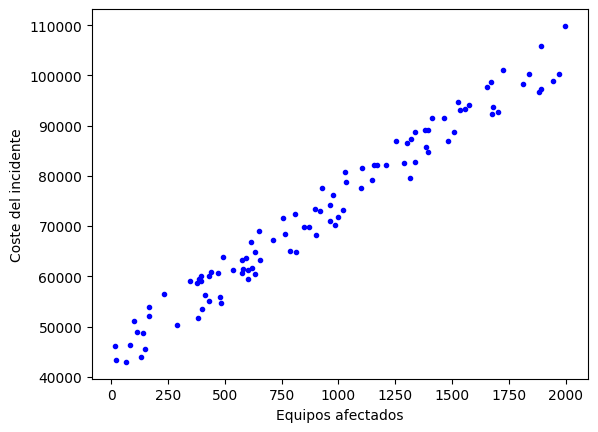

In [32]:
import matplotlib.pyplot as plt

# Crear el gráfico
plt.plot(df['n_equipos_afectados'], df['coste'], 'b.')
plt.xlabel('Equipos afectados')
plt.ylabel('Coste del incidente')

# Mostrar el gráfico
plt.show()


## Construir el modelo

In [34]:
from sklearn.linear_model import LinearRegression

In [68]:
# Construccion del modelo y ajuste de la funcion hipotesis
lin_reg = LinearRegression()
lin_reg.fit( df['n_equipos_afectados'].values.reshape(-1,1), df['coste'].values )

# df['n_equipos_afectados'].values.reshape(-1,1) es así porque skileanr espera una matriz donde las filas son
# el ejemplo de datos y las columnas cada uno de las caracteristicas de entrada (aunque solo sea una)
# df['coste'].values representa el valor y o etiqueta que solo es una puesto que representa el valor de coste
# de cada ejemplo

LinearRegression()

In [41]:
# Termino de sesgo (bias term)
lin_reg.intercept_

44892.32934749266

In [42]:
# Pesos calculados (en este caso solo uno)
lin_reg.coef_

array([30.25890735])

## Mostrar la funcion hipotesis generada (linea)

In [51]:
# Primero obtener el valor mínimo y máximo de 'n_equipos_afectados'
x_min_max = np.array([[df['n_equipos_afectados'].min()], [df['n_equipos_afectados'].max()]])

# Predecir los valores correspondientes del coste utilizando el modelo
y_train_pred = lin_reg.predict(x_min_max)

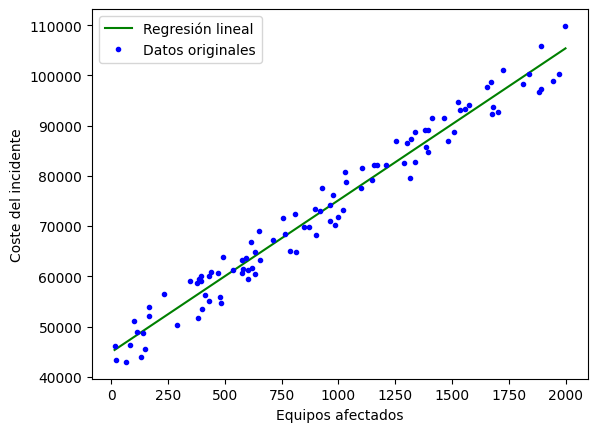

In [52]:
# Graficar la línea de regresión
plt.plot(x_min_max, y_train_pred, 'g-', label='Regresión lineal')

# Graficar los puntos originales
plt.plot(df['n_equipos_afectados'], df['coste'], 'b.', label='Datos originales')

# Etiquetas y mostrar gráfico
plt.xlabel('Equipos afectados')
plt.ylabel('Coste del incidente')
plt.legend()
plt.show()

## Predecir con nuevos ejemplos

In [53]:
x_new = np.array([[1200]]) # 1200 equipos afectados

# Prediccion del conste del incidente
coste = lin_reg.predict(x_new)
print(f'El coste del incidente de 1200 equipos afectados seria de ${int(coste[0])}')

El coste del incidente de 1200 equipos afectados seria de $81203


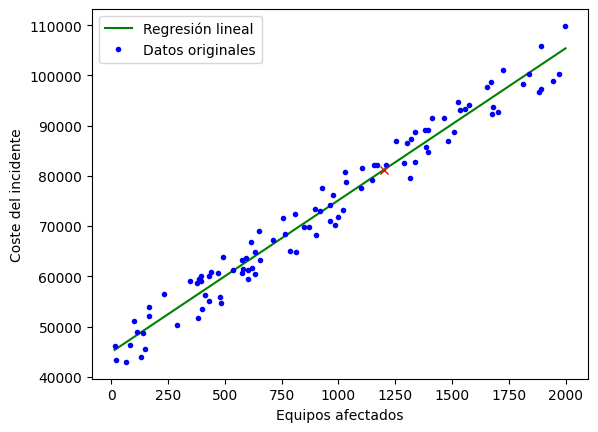

In [56]:
# Graficado
# Graficar la línea de regresión
plt.plot(x_min_max, y_train_pred, 'g-', label='Regresión lineal')

# Graficar los puntos originales
plt.plot(df['n_equipos_afectados'], df['coste'], 'b.', label='Datos originales')

# Graficar nuevo valor predecido
plt.plot(x_new, coste, 'rx')

# Etiquetas y mostrar gráfico
plt.xlabel('Equipos afectados')
plt.ylabel('Coste del incidente')
plt.legend()
plt.show()

In [66]:
# Otro ejemplo 
x_new2 = np.array([ [3010] ])
coste2 = lin_reg.predict(x_new2)

print(f'El coste del incidente de {x_new2[0]} equipos afectados seria de ${int(coste2[0])}')

El coste del incidente de [3010] equipos afectados seria de $135971


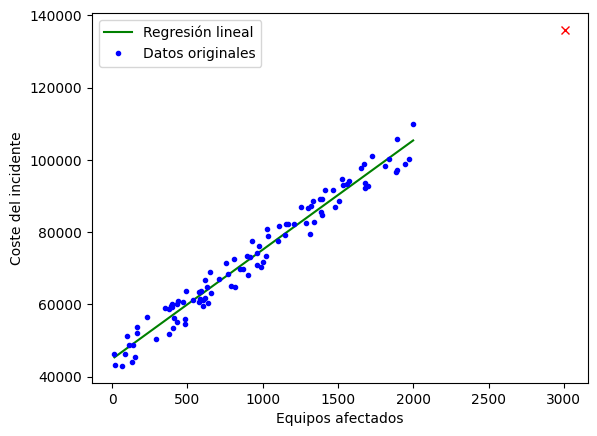

In [61]:
# Graficado
# Graficar la línea de regresión
plt.plot(x_min_max, y_train_pred, 'g-', label='Regresión lineal')

# Graficar los puntos originales
plt.plot(df['n_equipos_afectados'], df['coste'], 'b.', label='Datos originales')

# Graficar nuevo valor predecido
plt.plot(x_new2, coste2, 'rx')

# Etiquetas y mostrar gráfico
plt.xlabel('Equipos afectados')
plt.ylabel('Coste del incidente')
plt.legend()
plt.show()